### Importing dependencies 

In [92]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

import datetime
from itertools import product

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings('ignore')

### Information about dataset

**People**

* ID: Customer’s unique identifier
* Year_Birth: Customer’s birth year
* Education: Customer’s education level
* Marital_Status: Customer’s marital status
* Income: Customer’s yearly household income
* Kidhome: Number of children in customer’s household
* Teenhome: Number of teenagers in customer’s household
* Dt_Customer: Date of customer’s enrollment with the company
* Recency: Number of days since customer’s last purchase
* Complain: 1 if customer complained in the last 2 years, 0 otherwise
* Country: Customer’s location

**Products** 

* MntWines: Amount spent on wine in the last 2 years
* MntFruits: Amount spent on fruits in the last 2 years
* MntMeatProducts: Amount spent on meat in the last 2 years
* MntFishProducts: Amount spent on fish in the last 2 years
* MntSweetProducts: Amount spent on sweets in the last 2 years
* MntGoldProds: Amount spent on gold in the last 2 years

**Place**

* NumWebPurchases: Number of purchases made through the company’s web site
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s web site in the last month
* NumDealsPurchases: Number of purchases made with a discount



**Promotion**


* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Reading the data 

In [93]:
df = pd.read_csv('marketing_data.csv')

## Data Cleaning and Analysis

In [94]:
print("This dataset has {}".format(df.shape[0])+" rows and {}".format(df.shape[1])+ " columns")

This dataset has 2240 rows and 28 columns


In [95]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [96]:
# General information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Correcting data types 

In [97]:
df['ID'] = df['ID'].astype('O')

In [98]:
#df.columns = df.columns.str.replace(' ', '')
df = df.rename(columns={' Income ': 'Income'})

In [99]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

In [100]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   object        
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Checking for duplicates

In [102]:
df.duplicated().sum()

0

### Checking NA values

In [103]:
df_nas = pd.DataFrame(df.isna().sum(), columns=['Number of NAs'])
df_nas['Percentage of NAs'] = round(df_nas['Number of NAs'] / df.shape[0] *100, 3)
df_nas

,Number of NAs,Percentage of NAs
ID,0,0.000
Year_Birth,0,0.000
Education,0,0.000
Marital_Status,0,0.000
Income,24,1.071
Kidhome,0,0.000
Teenhome,0,0.000
Dt_Customer,0,0.000
Recency,0,0.000
MntWines,0,0.000


### Filling NA values

In [104]:
df['Income'].fillna(df['Income'].median(), inplace=True)

### Summary Statistics

In [105]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [106]:
df.describe(include='object')

,ID,Education,Marital_Status,Country
count,2240,2240,2240,2240
unique,2240,5,8,8
top,4095,Graduation,Married,SP
freq,1,1127,864,1095


## Feature Engineering

In [107]:
df['children'] = df['Kidhome'] + df['Teenhome']

In [108]:
df['spendings'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [109]:
df['spendings'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: spendings, dtype: float64

In [110]:
bins = [5, 500, 1000, 1500, 2000, np.inf]
cuts = ['500', '500-1000', '1000-1500', '1500-2000', '2000+']
df['spending_cat'] = pd.cut(df['spendings'], bins, labels=cuts)

In [111]:
df['num_purch'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumWebVisitsMonth']

## Data Visualization

In [112]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'children',
       'spendings', 'spending_cat', 'num_purch'],
      dtype='object')

In [113]:
counts = df['Country'].value_counts()
counts

SP     1095
SA      337
CA      268
AUS     160
IND     148
GER     120
US      109
ME        3
Name: Country, dtype: int64

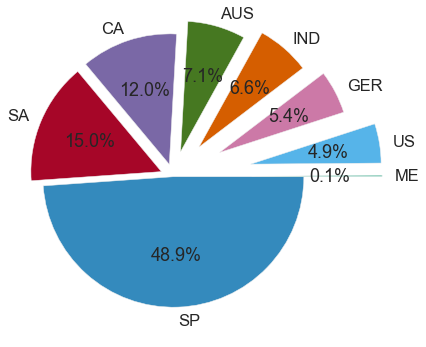

In [114]:
plt.subplots(figsize=[6,6])
explode = ( 0,0.1,0.1,0.2,0.3,0.4,0.6,0.6)
counts = df['Country'].value_counts()
sizes = counts.values.tolist()
plt.pie(sizes,labels=counts.index, explode = explode,  counterclock=False, autopct='%1.1f%%')
plt.show()

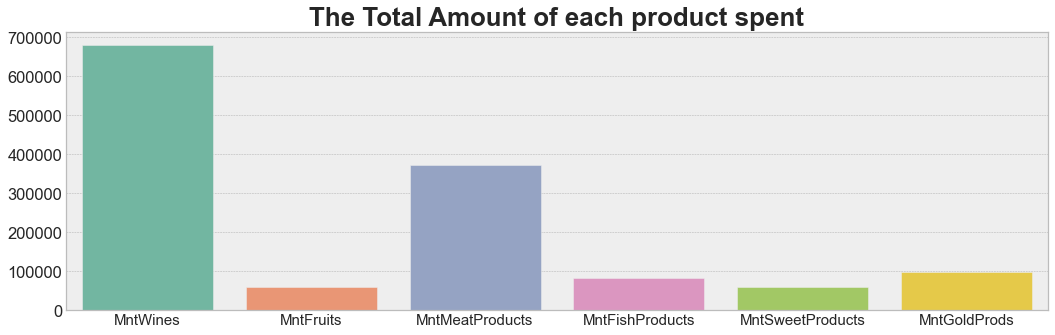

In [115]:
col_products = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data = df[col_products].sum()
plt.figure(figsize=(15,5))
plt.title('The Total Amount of each product spent',fontweight ="bold")
x=sns.barplot(x=col_products,y=data.values,palette='Set2')
x.set_xticklabels(col_products, size=15)
plt.tight_layout()

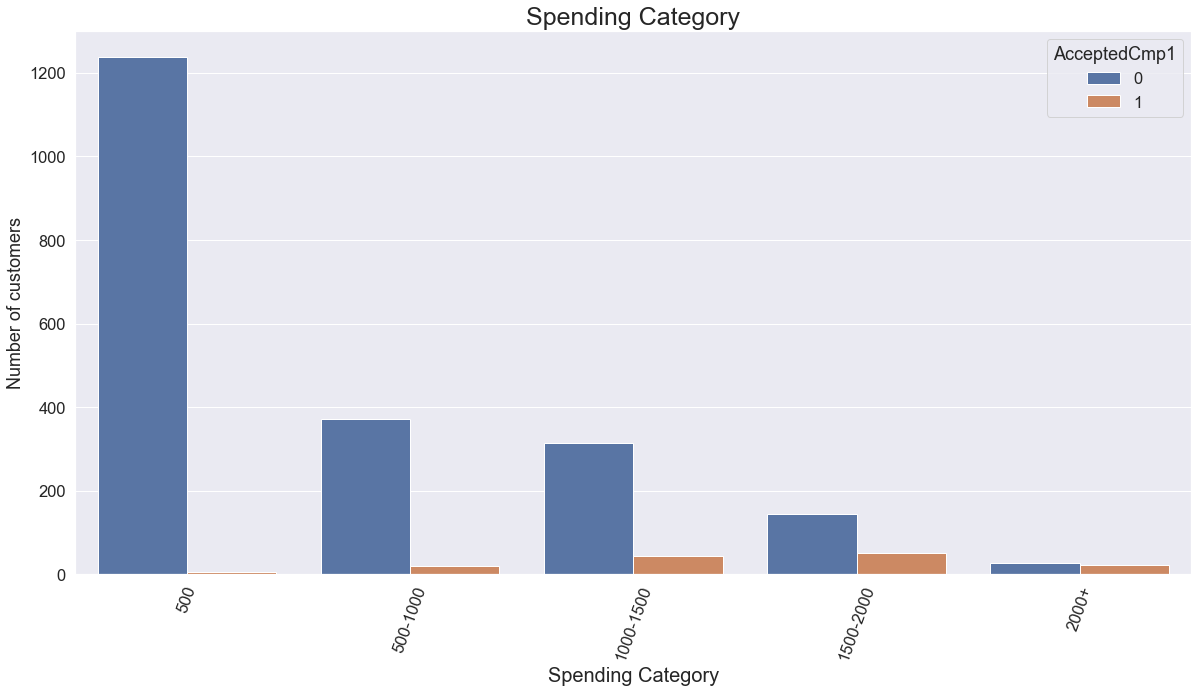

In [116]:
plt.figure(figsize=(20, 10))
sns.set(font_scale = 1.5)
ax = sns.countplot(df["spending_cat"],hue=df["AcceptedCmp1"], data= df)
plt.xlabel("Spending Category", size = 20)
plt.ylabel('Number of customers')
plt.title("Spending Category", size = 25 )
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.show()

In [117]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'children',
       'spendings', 'spending_cat', 'num_purch'],
      dtype='object')

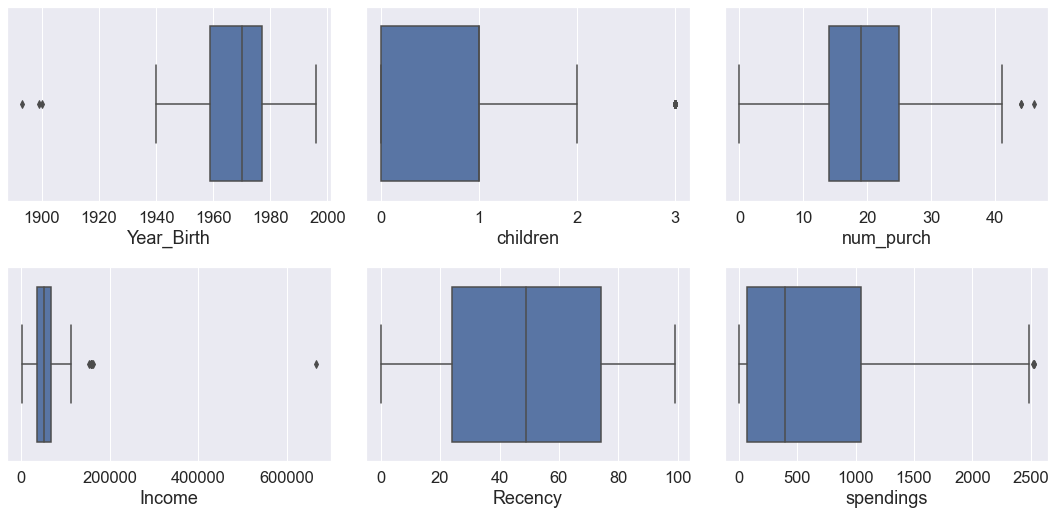

In [118]:
fig, axs = plt.subplots(2,3, figsize = (15,7.5))
plt1 = sns.boxplot(df['Year_Birth'], ax = axs[0,0])
plt2 = sns.boxplot(df['children'], ax = axs[0,1])
plt3 = sns.boxplot(df['num_purch'], ax = axs[0,2])
plt4 = sns.boxplot(df['Income'], ax = axs[1,0])
plt5 = sns.boxplot(df['Recency'], ax = axs[1,1])
plt6 = sns.boxplot(df['spendings'], ax = axs[1,2])

plt.tight_layout()

In [119]:
df['Year_Birth'] = df[df['Year_Birth']>1900]

array([[<AxesSubplot:title={'center':'Year_Birth'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Kidhome'}>,
        <AxesSubplot:title={'center':'Teenhome'}>],
       [<AxesSubplot:title={'center':'Recency'}>,
        <AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>,
        <AxesSubplot:title={'center':'NumDealsPurchases'}>],
       [<AxesSubplot:title={'center':'NumWebPurchases'}>,
        <AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>,
        <AxesSubplot:title={'center':'NumWebVisitsMonth'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'spendings'}>,
       

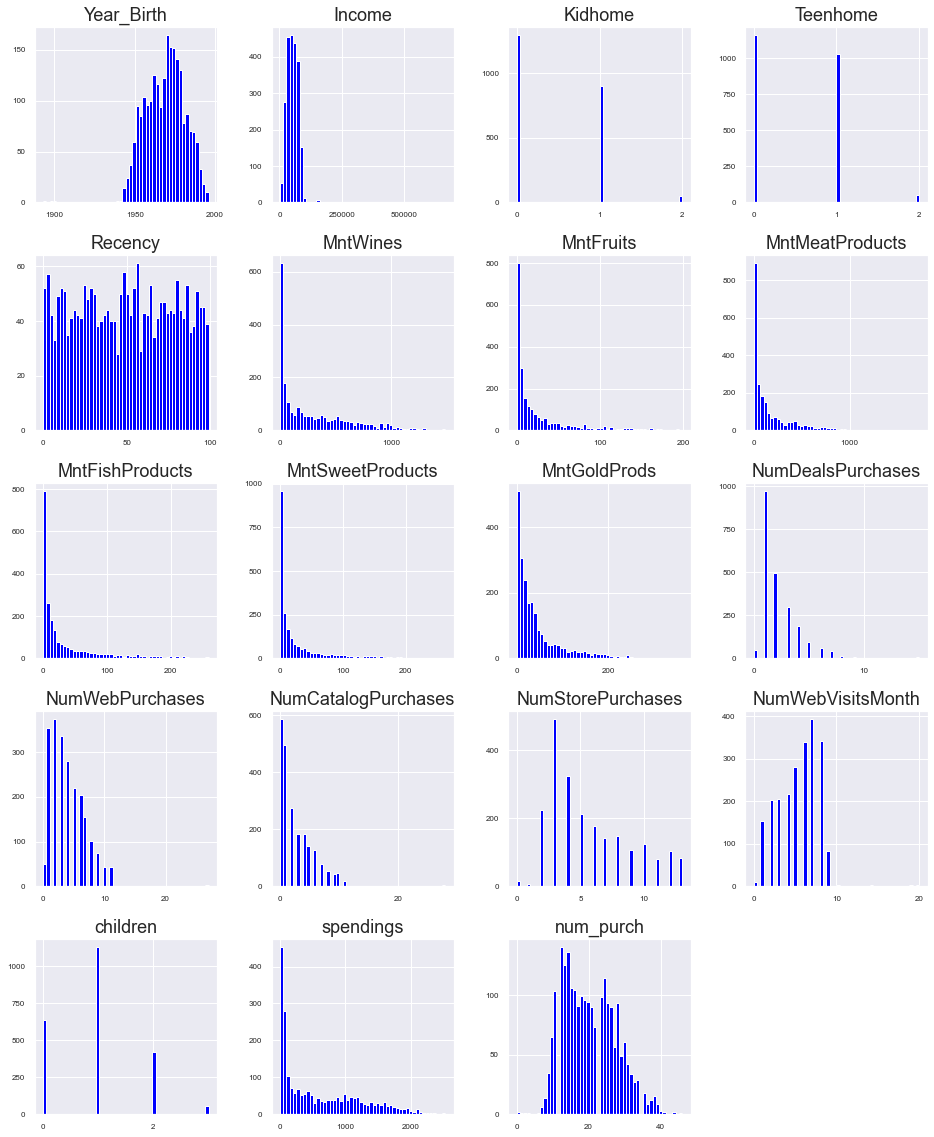

In [29]:
list(set(df.dtypes.tolist()))
df_num = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,color="Blue")

Text(0, 0.5, '')

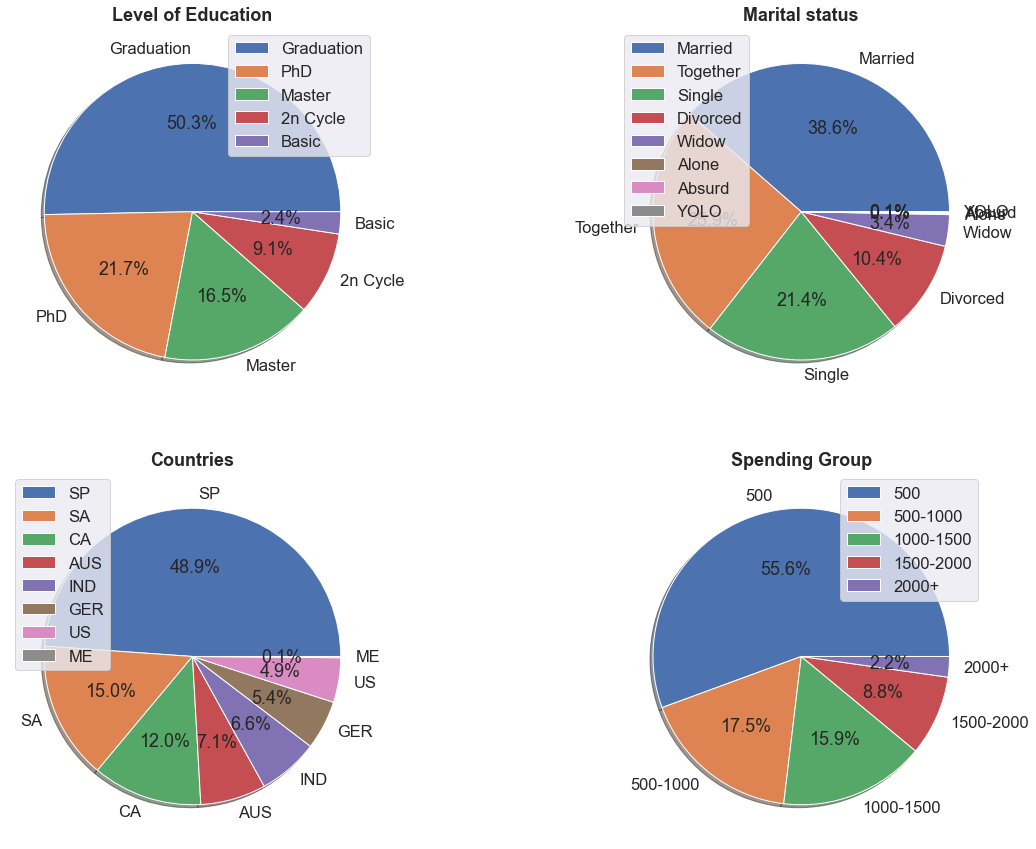

In [120]:
f,ax=plt.subplots(2,2,figsize=(20,15))
df['Education'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][0],shadow=True,legend=True)
ax[0][0].set_title('Level of Education',fontweight ="bold") 
ax[0][0].set_ylabel('')
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0][1],shadow=True,legend=True)
ax[0][1].set_title('Marital status',fontweight ="bold") 
ax[0][1].set_ylabel('')
df['Country'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][0],shadow=True,legend=True)
ax[1][0].set_title('Countries',fontweight ="bold") 
ax[1][0].set_ylabel('')
df['spending_cat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1][1],shadow=True,legend=True)
ax[1][1].set_title('Spending Group',fontweight ="bold") 
ax[1][1].set_ylabel('')

## Clustering

In [121]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'children',
       'spendings', 'spending_cat', 'num_purch'],
      dtype='object')

In [122]:
df = pd.get_dummies(df, columns = ['Education', 'Marital_Status'])

In [123]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'children', 'spendings',
       'spending_cat', 'num_purch', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')

In [124]:
df = df.drop(['ID','Dt_Customer','Year_Birth','Country','spending_cat'], axis=1)

## PCA

In [125]:
X = df.values
# Data Normalization
X_std = StandardScaler().fit_transform(df)

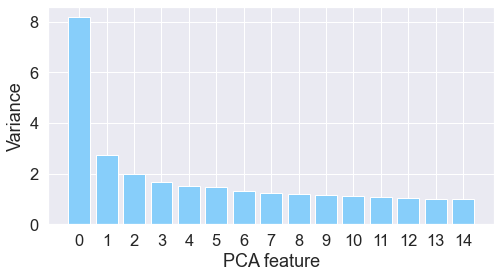

In [126]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(X_std)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [127]:
pca = PCA(n_components=7)
pca_data = pca.fit_transform(X_std)

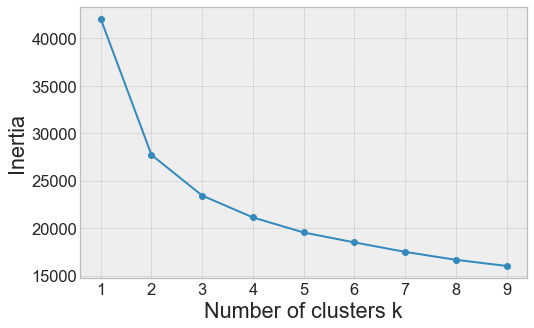

In [128]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(pca_data)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

Looks like the best value  for k is 2 (two clusters).

Awesome. Having now applied our specific PCA model with the movie dataset, let's visualise the first 2 projection components as a 2D scatter plot to see if we can get a quick feel for the underlying data.

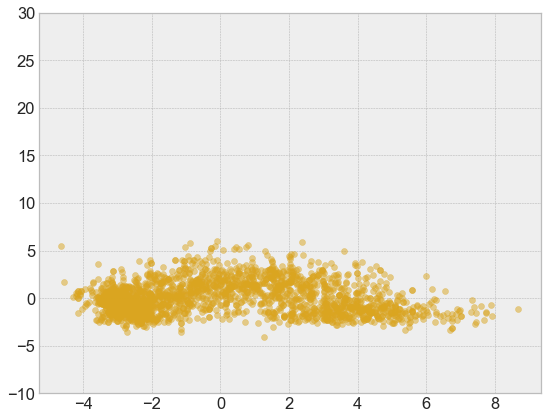

In [129]:
plt.figure(figsize = (9,7))
plt.scatter(dim[:,0], dim[:,1], c='goldenrod',alpha=0.5)
plt.ylim(-10,30)
plt.show()

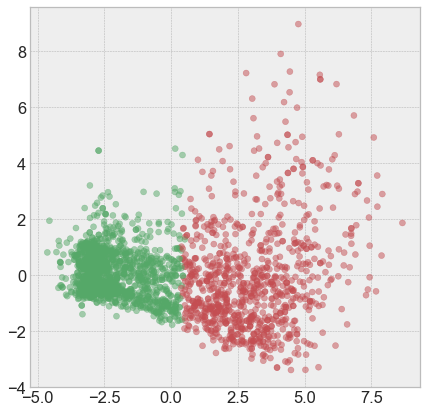

In [130]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=2)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(dim)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(dim[:,0],dim[:,2], c= label_color, alpha=0.5) 
plt.show()

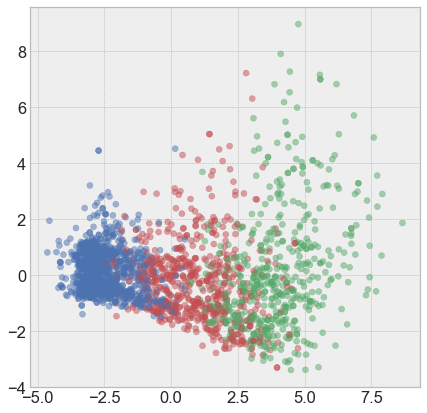

In [143]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(dim)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(dim[:,0],dim[:,2], c= label_color, alpha=0.5) 
plt.show()

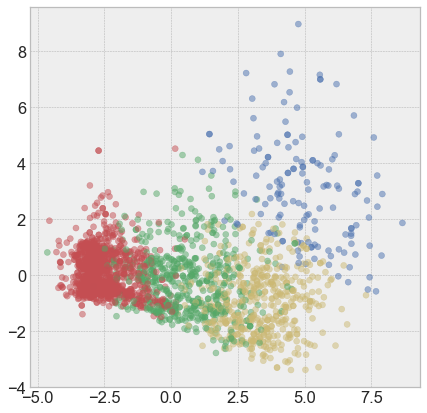

In [144]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=4)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(dim)

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(dim[:,0],dim[:,2], c= label_color, alpha=0.5) 
plt.show()

##  DBSCAN

To choose the best combination of the algorithm parameters I will first create a matrix of investigated combinations.

In [131]:
eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

Colecting number of generated clusters.

In [132]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(x_num)
DBSCAN_clustered = x_num.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [133]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2236
0,4


In [134]:
DBS_clustering = DBSCAN(eps=2, min_samples=3).fit(x_num)
DBSCAN_clustered = x_num.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2212
0,3
1,3
2,3
3,4
4,3
5,3
6,3
7,3


In [135]:
DBS_clustering = DBSCAN(eps=0.01, min_samples=3).fit(x_num)
DBSCAN_clustered = x_num.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2212
0,3
1,3
2,3
3,4
4,3
5,3
6,3
7,3


In [136]:
df1 = pd.DataFrame(dim)

In [137]:
DBS_clustering = DBSCAN(eps=0.01, min_samples=3).fit(df1)
DBSCAN_clustered = df1.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,2222
0,3
1,3
2,3
3,3
4,3
5,3


In [138]:
def dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

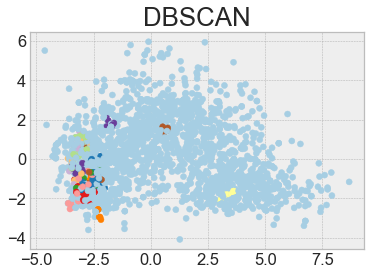

In [139]:
dbscan(dim, eps = .5, min_samples=5)

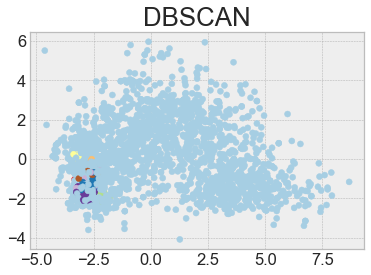

In [140]:
dbscan(dim, eps = .5, min_samples=10)

## Hierarchical Clustering

In [141]:
# Standardizing data
cluster_data = df[['Income', 'Recency', 'spendings']]
scaler = StandardScaler()
data_stand = scaler.fit_transform(cluster_data)

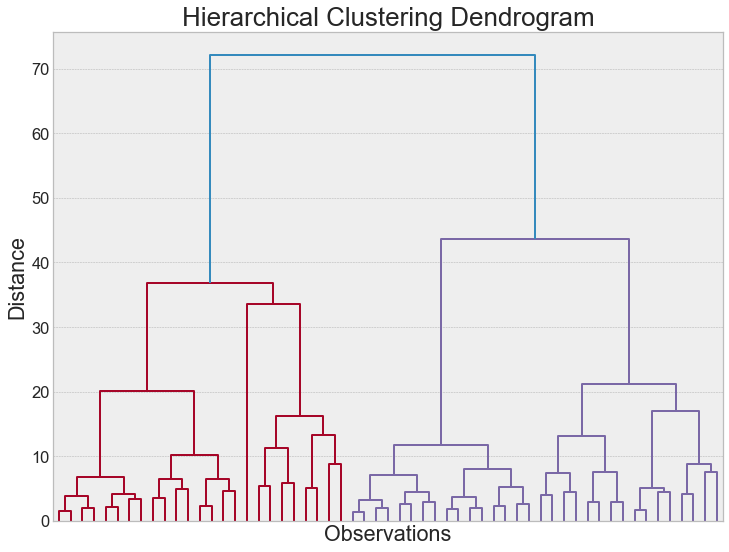

In [142]:
hier_clust = linkage(data_stand, method = 'ward')
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5,
           no_labels = True)
plt.show()